# Data
- files in /Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/He-3data/He3-results.xlsx
    - Each sheet within the Excel file is for a given angle.
    - In green, the XP data.
    - In yellow the reconstructed data.


In [119]:
%matplotlib inline

   exp_energy  exp_spectrum_norm  reconstr_energy  reconstr_spectrum_norm
0    2105.775           0.202219         -892.925                     0.0
1    2115.325           0.208587         -883.375                     0.0
2    2124.875           0.184054         -873.825                     0.0
3    2134.425           0.231867         -864.275                     0.0
4    2143.975           0.237921         -854.725                     0.0
   exp_energy  exp_spectrum_norm  reconstr_energy  reconstr_spectrum_norm
0    1905.225           0.195736         -892.925                     0.0
1    1914.775           0.229366         -883.375                     0.0
2    1924.325           0.147436         -873.825                     0.0
3    1933.875           0.132971         -864.275                     0.0
4    1943.425           0.117197         -854.725                     0.0
   exp_energy  exp_spectrum_norm  reconstr_energy  reconstr_spectrum_norm
0    1609.175           0.085964      

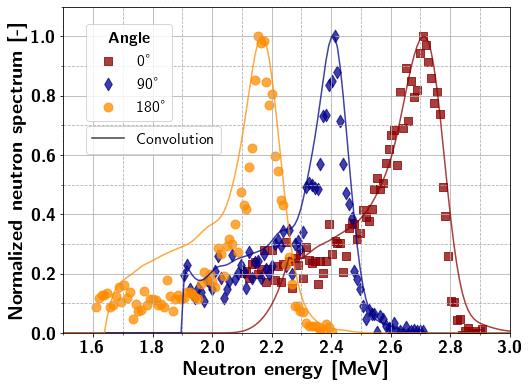

In [120]:
import time
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import AutoMinorLocator
import re

import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

fname = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/He-3data/He3-results.xlsx'

# each sheet is a different angle
angles = []

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
markersize = 80
fs = 20
markers = ['s', 'd', 'o']
colors =['darkred', 'darkblue', 'darkorange']
labels = ['0°', '90°', '180°']

for jj in np.arange(0,3):
    color = colors[jj]
    marker = markers[jj]  
    data = pd.read_excel(fname, sheet_name=jj, skiprows=3)
    data = data[data.columns[[1,2,5,6]]]
    data.columns = ['exp_energy', 'exp_spectrum_norm', 'reconstr_energy', 'reconstr_spectrum_norm']
#     print(data.columns[[1,2,5,6]])

    angles.append(data)
    print(data.head())
    X = data['exp_energy'].values / 1000  # MeV
    _ = plt.scatter(X, data['exp_spectrum_norm'].values, color=color, marker=marker, s=markersize, alpha=0.75, label=labels[jj])

my_handles, my_labels = ax1.get_legend_handles_labels()
leg1 = plt.legend(my_handles, my_labels, loc=(0.05, 0.65), fontsize=fs-4)
leg1.set_title(r"\textbf{Angle}", prop = {'size': fs-4})

labels = ['Convolution', 'Convolution', 'Convolution']

for jj in np.arange(0,3):
    color = colors[jj]
    data = angles[jj]
    X = data['reconstr_energy'].values / 1000  # MeV

    _1 = plt.plot(X, data['reconstr_spectrum_norm'].values, color=color, alpha=0.75, label=labels[jj])
    
    
my_handles, my_labels = ax1.get_legend_handles_labels()
# print(my_handles, my_labels)
# leg1 = plt.legend(my_handles, my_labels, loc=(0.25, 0.65), markerscale=0, fontsize=fs-4)


ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlim(1.5,3.0)
plt.ylim(0,1.1)

plt.xlabel(r'\textbf{Neutron energy [MeV]}', fontsize=fs)
plt.ylabel(r'\textbf{Normalized neutron spectrum [-]}', fontsize=fs)

ax1.tick_params('x', colors='black', labelsize=fs-2)	
ax1.tick_params('y', colors='black', labelsize=fs-2)	
# x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)    



leg2 = ax1.legend([my_handles[0]], [my_labels[0]], loc=(0.05, 0.55), fontsize=fs-4)
leg2.legendHandles[0].set_color('black')
# leg2.set_title(r"\textbf{Experiment}", prop = {'size': fs-4})
# Manually add the first legend back
ax1.add_artist(leg1)
plt.show()

# Simulation alone

/Users/hkromer/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/hkromer/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/hkromer/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: RankWarning: Polyfit may be poorly conditioned


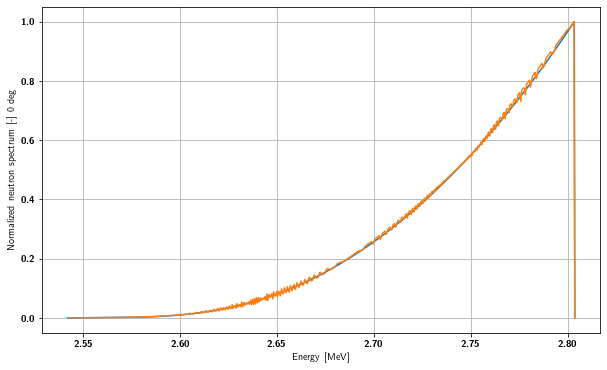

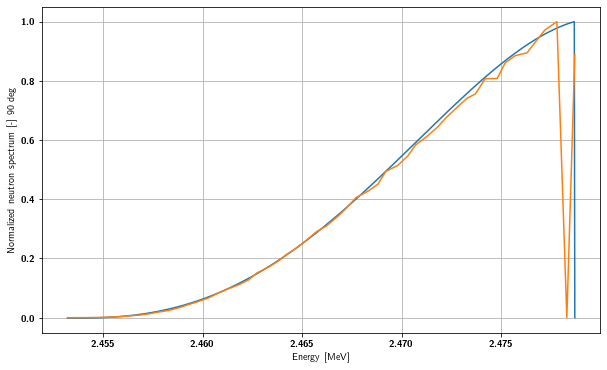

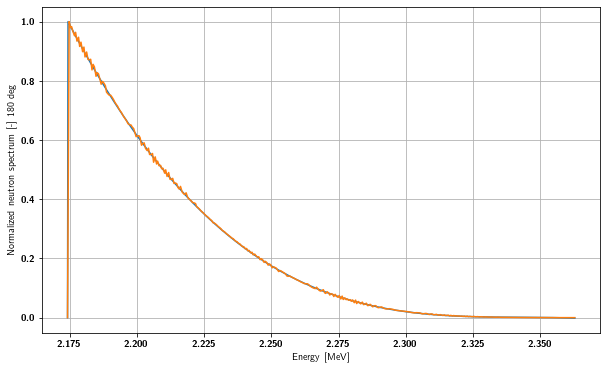

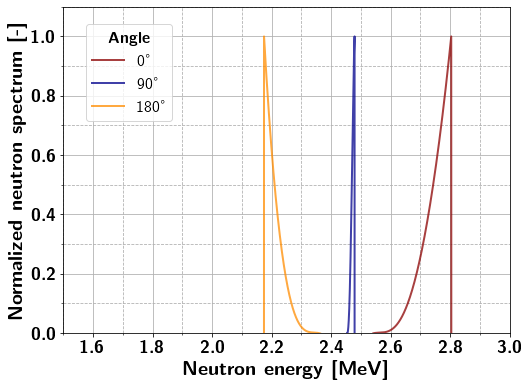

In [122]:
# import the data for the non-convolved
fname = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/He-3data/80kV_simulation_spectra.xlsx'

data = pd.read_excel(fname, skiprows=1)
# data = data[data.columns[[1,2,5,6]]]
# data.columns = ['exp_energy', 'exp_spectrum_norm', 'reconstr_energy', 'reconstr_spectrum_norm']
data = data.iloc[0:3,2:]
data = data.T
data = data.reset_index()
data.columns = ['energy', '0_deg', '90_deg', '180_deg']

# normalize and convert to float
interps = []
for col in ['0_deg', '90_deg', '180_deg']:
    data_t = data[['energy', col]]
    data_t[col] = data_t[col].astype(float)
    data_t[col] = data_t[col].replace(0, np.nan)
    data_t = data_t[data_t[col].notnull()] 
    data_t = data_t[data_t[col] > 0.01]    
    
    data_t = data_t.sort_values(by='energy')
    data_interp = pd.DataFrame()

    X = np.linspace(data_t['energy'].values[0], data_t['energy'].values[-1],1000)
    data_interp['energy'] = X
    poly = np.polyfit(data_t['energy'].values, data_t[col].values, 5)
    poly_y = np.poly1d(poly)(X)
    data_interp[col] = poly_y
#     if col == '0_deg': # benoit said 0 and 180 deg values the maximum should be set to 0
#         data[col] = data[col].apply(lambda x: x if x != np.max(data[col]) else 0)
#         data_interp[col] = data_interp[col].apply(lambda x: x if x != np.max(data_interp[col]) else 0)
        
#     if col == '180_deg': # benoit said 0 and 180 deg values the maximum should be set to 0
    data[col] = data[col].apply(lambda x: x if x != np.max(data[col]) else 0)
    data_interp[col] = data_interp[col].apply(lambda x: x if x != np.max(data_interp[col]) else 0)
        

    data[col] = data[col] / np.max(data[col])
    data_interp[col] = data_interp[col] / np.max(data_interp[col])
    data_interp.to_csv(f'/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/He-3data/{col}_interp_data.csv')
    interps.append(data_interp)
# print(data.head())
for interp_data,col in zip(interps,['0_deg', '90_deg', '180_deg']):

    fig = plt.figure(figsize=(10, 6))

    interp_data = interp_data.sort_values(by='energy')
    elow = interp_data['energy'].values[0]
    ehigh = interp_data['energy'].values[-1]
    raw_data = data[['energy', col]]
    raw_data = raw_data[ (raw_data['energy'] >= elow) & (raw_data['energy'] <= ehigh) ]
#     t = data[ (data['energy']>2.6) & (data['energy']<2.75)]
    plt.plot(interp_data['energy'].values, interp_data[col].values)
    plt.plot(raw_data['energy'].values, raw_data[col].values)
    
    plt.xlabel(f'Energy [MeV]')
    ll = col.replace('_',' ')
    plt.ylabel(f'Normalized neutron spectrum [-] {ll}')

    plt.grid()
    plt.show()
    
    
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
markersize = 80
fs = 20
markers = ['s', 'd', 'o']
colors =['darkred', 'darkblue', 'darkorange']
labels = ['0°', '90°', '180°']
columns = ['0_deg', '90_deg', '180_deg']

for jj in np.arange(0,3):
    color = colors[jj]
    marker = markers[jj]  
    col = columns[jj]
    data_t = interps[jj]
    data_t = data_t.sort_values(by='energy')
    X = data_t['energy'].values  # MeV
    _ = plt.plot(X, data_t[col].values, color=color, alpha=0.75, label=labels[jj], linewidth=2)

    
leg1 = plt.legend(loc=(0.05, 0.65), fontsize=fs-4)
leg1.set_title(r"\textbf{Angle}", prop = {'size': fs-4})



ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlim(1.5,3.0)
plt.ylim(0,1.1)

plt.xlabel(r'\textbf{Neutron energy [MeV]}', fontsize=fs)
plt.ylabel(r'\textbf{Normalized neutron spectrum [-]}', fontsize=fs)

ax1.tick_params('x', colors='black', labelsize=fs-2)	
ax1.tick_params('y', colors='black', labelsize=fs-2)	
# x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)    


plt.show()

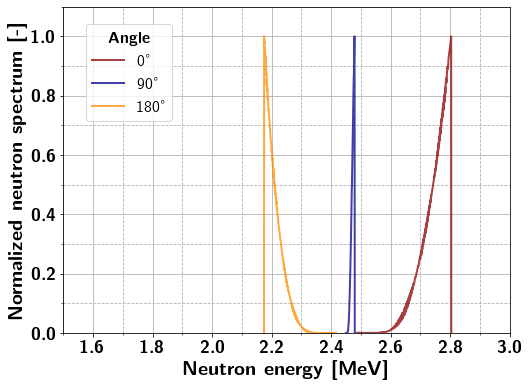

In [123]:
# import the data for the non-convolved
fname = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/He-3data/80kV_simulation_spectra.xlsx'

data = pd.read_excel(fname, skiprows=1)
# data = data[data.columns[[1,2,5,6]]]
# data.columns = ['exp_energy', 'exp_spectrum_norm', 'reconstr_energy', 'reconstr_spectrum_norm']
data = data.iloc[0:3,2:]
data = data.T
data = data.reset_index()
data.columns = ['energy', '0_deg', '90_deg', '180_deg']

# normalize and convert to float
data_interp = pd.DataFrame()
X = np.arange(data['energy'].values[0], data['energy'].values[-1]+0.1, 0.1)
data_interp['energy'] = X
for col in ['0_deg', '90_deg', '180_deg']:
    data[col] = data[col].astype(float)
    data[col] = data[col].replace(0, np.nan)

#     poly = np.polyfit(data['energy'].values, data[col].values, 8)
#     poly_y = np.poly1d(poly)(X)
#     data_interp[col] = poly_y

    if col == '0_deg': # benoit said 0 and 180 deg values the maximum should be set to 0
        data[col] = data[col].apply(lambda x: x if x != np.max(data[col]) else 0)
#         data_interp[col] = data_interp[col].apply(lambda x: x if x != np.max(data_interp[col]) else 0)
        
    if col == '180_deg': # benoit said 0 and 180 deg values the maximum should be set to 0
        data[col] = data[col].apply(lambda x: x if x != np.max(data[col]) else 0)
#         data_interp[col] = data_interp[col].apply(lambda x: x if x != np.max(data_interp[col]) else 0)
        
#     print(np.max(data[col]))
    data[col] = data[col] / np.max(data[col])
#     data_interp[col] = data_interp[col] / np.max(data_interp[col])
    
    
data.to_csv('/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/Figures/neutron_spectrum/neutron_spectrum_simulation.csv')  
# data_interp.to_csv('/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/Figures/neutron_spectrum/INTERPOLATED_neutron_spectrum_simulation.csv')  

# each sheet is a different angle
angles = []

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
markersize = 80
fs = 20
markers = ['s', 'd', 'o']
colors =['darkred', 'darkblue', 'darkorange']
labels = ['0°', '90°', '180°']
columns = ['0_deg', '90_deg', '180_deg']

for jj in np.arange(0,3):
    color = colors[jj]
    marker = markers[jj]  
    col = columns[jj]
    data_t = data[['energy', col]]
    data_t = data_t.sort_values(by='energy')
    X = data_t['energy'].values  # MeV
    _ = plt.plot(X, data_t[col].values, color=color, alpha=0.75, label=labels[jj], linewidth=2)

    
leg1 = plt.legend(loc=(0.05, 0.65), fontsize=fs-4)
leg1.set_title(r"\textbf{Angle}", prop = {'size': fs-4})



ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlim(1.5,3.0)
plt.ylim(0,1.1)

plt.xlabel(r'\textbf{Neutron energy [MeV]}', fontsize=fs)
plt.ylabel(r'\textbf{Normalized neutron spectrum [-]}', fontsize=fs)

ax1.tick_params('x', colors='black', labelsize=fs-2)	
ax1.tick_params('y', colors='black', labelsize=fs-2)	
# x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)    


plt.show()

In [124]:
col = '0_deg'
np.min(data[col].values)

nan

In [125]:
df_interp = pd.DataFrame()
X = np.arange(30, 205+0.1, 0.1)
df_interp['X'] = X
# interpolate
for col in ['N', 'S', 'W', 'E']:
    poly = np.polyfit(df.index.values, df[col].values/scale_y,5)
    
    poly_y = np.poly1d(poly)(X)
    df_interp[col+'_poly'] = poly_y

NameError: name 'df' is not defined

In [ ]:
fig = plt.figure(figsize=(10, 6))

l = '0'
col = f'{l}_deg'
data_t = data[['energy', col]]
data_t = data_t.sort_values(by='energy')
t = data_t[ (data_t['energy']>2.6) & (data_t['energy']<2.75)]
plt.plot(t['energy'].values, t[col].values, label=l+' deg')
plt.xlabel('Energy [MeV]')
plt.ylabel('Normalized neutron spectrum [-]')
plt.legend()
plt.grid()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 6))

l = '180'
col = f'{l}_deg'
data_t = data[['energy', col]]
data_t = data_t.sort_values(by='energy')
t = data_t[ (data_t['energy']>2.25) & (data_t['energy']<2.3)]
plt.plot(t['energy'].values, t[col].values, label=l+' deg')
plt.xlabel('Energy [MeV]')
plt.ylabel('Normalized neutron spectrum [-]')
plt.legend()
plt.grid()
plt.show()

# Simulation and experiment

In [ ]:
# import the data for the non-convolved

fname_experiment = '/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/He-3data/He3-results.xlsx'
interps = []
cols = ['0_deg', '90_deg', '180_deg']
for col in cols:
    fname = f'/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/He-3data/{col}_interp_data.csv'
    data_simu = pd.read_csv(fname, index_col=0)
    for c in data_simu.columns:
        data_simu[c] = data_simu[c].astype(float)
    interps.append(data_simu)
    
# data.to_csv('/Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2019/01.CharacterizationPaper/Figures/neutron_spectrum/neutron_spectrum_simulation.csv')  
# each sheet is a different angle
angles = []

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1)
markersize = 80
fs = 20
markers = ['s', 'd', 'o']
colors =['darkred', 'darkblue', 'darkorange']
labels = ['0°', '90°', '180°']
columns = ['0_deg', '90_deg', '180_deg']

# lines = [(0,(5,1)),(0,(5,5)),(0,(5,10))]
lines = ['dotted','dotted','dotted']
labels = ['0°, unconvolved', '90°, unconvolved', '180°, unconvolved']
for jj in np.arange(0,3):
    # unconvolved data
    color = colors[jj]
    marker = markers[jj]  
    col = columns[jj]
    data_t = interps[jj]
    data_t = data_t.sort_values(by='energy')
    X = data_t['energy'].values  # MeV
    _ = plt.plot(X, data_t[col].values, linestyle=lines[jj], color=color, alpha=0.75, label=labels[jj], linewidth=2.5)

labels = ['0°, experiment', '90°, experiment', '180°, experiment']
for jj in np.arange(0,3):
    # experimental data
    color = colors[jj]
    marker = markers[jj]  
    data_experiment = pd.read_excel(fname_experiment, sheet_name=jj, skiprows=3)
    data_experiment = data_experiment[data_experiment.columns[[1,2,5,6]]]
    data_experiment.columns = ['exp_energy', 'exp_spectrum_norm', 'reconstr_energy', 'reconstr_spectrum_norm']
#     print(data.columns[[1,2,5,6]])

    angles.append(data_experiment)
    print(data_experiment.head())
    X = data_experiment['exp_energy'].values / 1000  # MeV
    _ = plt.scatter(X, data_experiment['exp_spectrum_norm'].values, color=color, marker=marker, s=markersize, alpha=0.75, label=labels[jj])




labels = ['0°, convolution', '90°, convolution', '180°, convolution']
# lines = [(0,(1,1)),(0,(3,1,1,1)), (0,(3,1,1,1,1,1))]
lines = ['-','-','-']

for jj in np.arange(0,3):
    # reconstruction
    color = colors[jj]
    data = angles[jj]
    X = data['reconstr_energy'].values / 1000  # MeV

    _1 = plt.plot(X, data['reconstr_spectrum_norm'].values, linestyle=lines[jj], color=color, alpha=0.75, label=labels[jj])

hs, ls = ax1.get_legend_handles_labels()

leg1 = plt.legend([hs[6],hs[7],hs[8],hs[0],hs[1],hs[2],hs[3],hs[4],hs[5]],[ls[6],ls[7],ls[8],ls[0],ls[1],ls[2],ls[3],ls[4],ls[5]],loc="best", fontsize=fs-4)
# leg1.set_title(r"\textbf{Angle}", prop = {'size': fs-4})
ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlim(1.2,3.0)
ax1.set_xticks(np.arange(1.2,3.2,0.2))
plt.ylim(0,1.1)

plt.xlabel(r'\textbf{Neutron energy [MeV]}', fontsize=fs)
plt.ylabel(r'\textbf{Normalized neutron spectrum [-]}', fontsize=fs)

ax1.tick_params('x', colors='black', labelsize=fs-2)	
ax1.tick_params('y', colors='black', labelsize=fs-2)	
# x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# y
minor_locator = AutoMinorLocator(2)

ax1.yaxis.set_minor_locator(minor_locator)    



plt.show()

In [ ]:
col = '180_deg'


In [ ]:
np.max(data[col]) 

In [ ]:
data[col]